In [ ]:
!pip install opencv-python

In [62]:
import tensorflow as tf
import os 
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import time
from keras.metrics import Precision, Recall, BinaryAccuracy
from keras.models import load_model

In [2]:
data_path = 'data'
image_extensions = ['.jpeg', '.jpg', '.bmp', '.png']

In [8]:
# Clearing the data (Only if not sure)
for image_folder in os.listdir(data_path):
    for image in os.listdir(os.path.join(data_path,image_folder)):
        image_path = os.path.join(data_path, image_folder, image)
        try:
            img = Image.open(image_path)
            img.verify()
            if img is None:
                raise Exception("Failed to load image")
            file, ext = os.path.splitext(image_path)
            if ext not in image_extensions:
                print('Image has a wrong extension {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image has a wrong extension data\horses\2HF6HN5-jpg.webp
Image has a wrong extension data\horses\horse-breeds.jpg.webp
Image has a wrong extension data\horses\p3715-kon-na-kiju-hobby-horses-brauny-knorr-toys-40103.webp


In [3]:
# Loading the data
data = tf.keras.utils.image_dataset_from_directory('data')
time.sleep(1)
data_iterator = data.as_numpy_iterator()
time.sleep(1)
batch = data_iterator.next()

Found 240 files belonging to 2 classes.


In [15]:
batch = data_iterator.next()

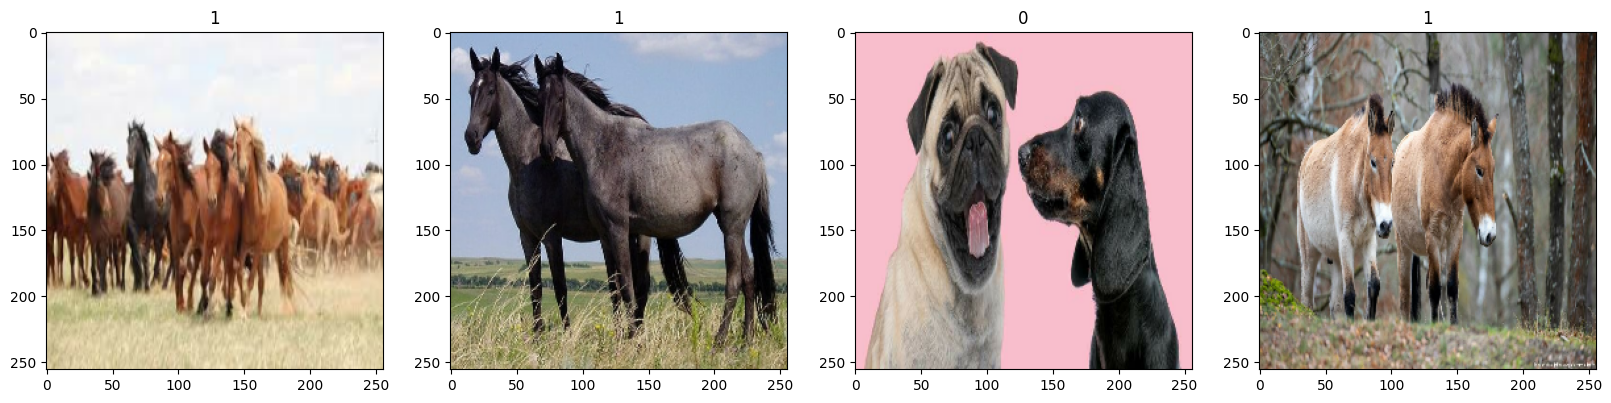

In [11]:
# Plotting data 0-Dogs 1-Horses
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [4]:
# Scaling values to fit between 0 and 1
data = data.map(lambda x,y: (x/255, y))

In [5]:
scaled_iterator = data.as_numpy_iterator()

In [26]:
len(data)

8

In [34]:
# Creating train, validation and test batches
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [37]:
test_size

1

In [38]:
# Creating model
model = Sequential()

In [39]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\maksp\Code\dogsvshorses\dogsvshorses\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [40]:
model.compile('adam',loss=tf._losses.BinaryCrossentropy(), metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
log_directory = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_directory)
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 582ms/step - accuracy: 0.4694 - loss: 0.8625 - val_accuracy: 0.6719 - val_loss: 0.6753
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 517ms/step - accuracy: 0.5582 - loss: 0.6872 - val_accuracy: 0.6719 - val_loss: 0.6578
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 475ms/step - accuracy: 0.5896 - loss: 0.6644 - val_accuracy: 0.5000 - val_loss: 0.6468
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 590ms/step - accuracy: 0.6503 - loss: 0.6193 - val_accuracy: 0.8438 - val_loss: 0.5090
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 524ms/step - accuracy: 0.7886 - loss: 0.4931 - val_accuracy: 0.7344 - val_loss: 0.4776
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 522ms/step - accuracy: 0.7266 - loss: 0.5176 - val_accuracy: 0.8281 - val_loss: 0.4069
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 477ms/step - accuracy: 0.7674 - loss: 0.4617 - val_accuracy: 0.8750 - val_loss: 0.4295
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 627ms/step - accuracy: 0.8147 - loss: 0.4422 - val_accuracy: 0.9062 - val_loss: 0.3589
Epo

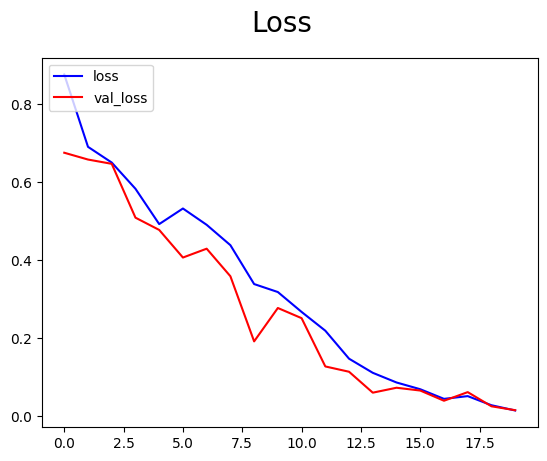

In [64]:
fig = plt.figure()
plt.plot(history.history['loss'],color='blue', label = 'loss')
plt.plot(history.history['val_loss'], color = 'red', label = 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

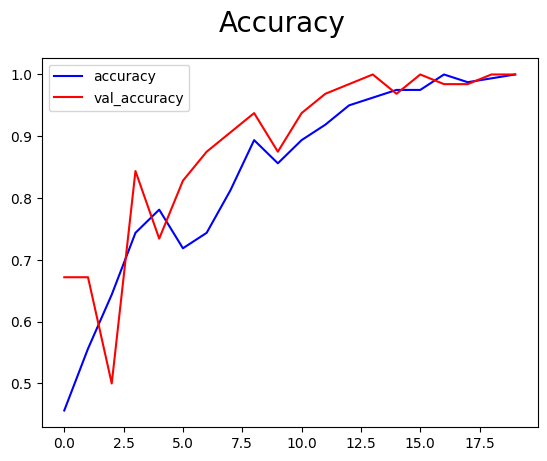

In [65]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='blue', label='accuracy')
plt.plot(history.history['val_accuracy'], color = 'red', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [ ]:
# Evaluating 

In [45]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [46]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y,yhat)
    recall.update_state(y,yhat)
    accuracy.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


In [47]:
print(f'Precision: {precision.result().numpy()}, Recall: {recall.result().numpy()}, Accuracy: {accuracy.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


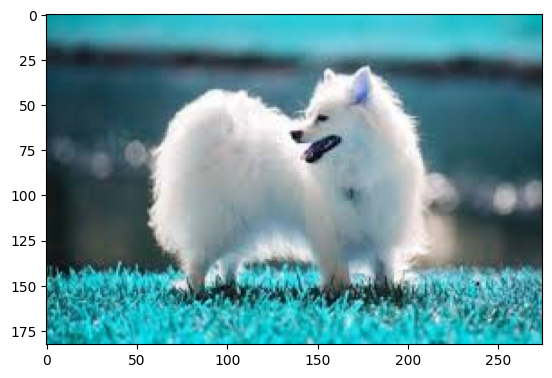

In [57]:
# Test
img = cv2.imread('test.jpg')
plt.imshow(img)
plt.show()

In [58]:
resized = tf.image.resize(img, (256,256))
yhat = model.predict(np.expand_dims(resized/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [61]:
if yhat < 0.5:
    print('Predicted class is dog')
else:
    print("Predicted class is horse")

Predicted class is dog


In [63]:
# Saving the model
model.save(os.path.join('models', 'dogsvshorses_V1.0.h5'))